# Problem Satatement 
Given a specific activation function
g(x) = k0 + k1x (1)
and categorical cross-entropy loss, design a Neural Network on
Banknote, MNIST or IRIS data where the activation function
parameters k0, k1 are learned from the data you choose from
one of the above-mentioned data sets. Your solution must
include the learnable parameter values i.e. final k0, k1 values
at the end of training, a plot depicting changes in k0, k1 at
each epoch, training vs test loss, train vs. test accuracy and a
Loss function plot.

In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


from keras.models import Sequential
from keras.layers import Dense 
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score , classification_report
import keras

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [6]:
mnist = pd.read_csv('datasets/MNIST_Train (1).csv')

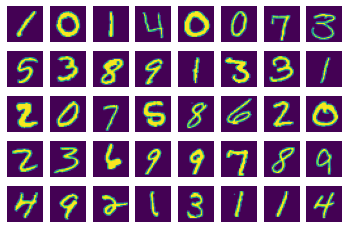

In [7]:
mnist1 = mnist.iloc[:,1:786]
mnist1 = np.array(mnist1)
for i in range (40):
    plt.subplot(5,8,i+1)
    plt.imshow(mnist1[i,:].reshape(28,28))
    plt.axis('off')

In [8]:
mnist_x = mnist.iloc[:, 1:786]
mnist_y = mnist.iloc[:,0]
train_x , test_x , train_y , test_y = train_test_split(mnist_x , mnist_y , test_size=0.2)
train_y= to_categorical(train_y)

In [9]:
train_x.shape

(33600, 784)

In [23]:
class mnist_model:


    
    def __init__(self , activation_fun , train_x , train_y , test_x , test_y):
        self.activation_fun = activation_fun
        self.train_x = train_x
        self.train_y =train_y
        self.test_x = test_x
        self.test_y = test_y
        self.model = Sequential()
        self.weights_dict = {}
        self.history = []
        self.cls_rpt =[]
        self.accuracy =0
        self.f1_score = 0
        self.conf_matrix=[]
        self.loss = 0
        self.pred =[]
        self.f1_score=0
        self.k_vals=[]
    
    def execute_model(self):
        self.model = Sequential()
        self.model.add(Dense(392, activation=self.activation_fun ,name ='L0',kernel_initializer='he_uniform' ))
        self.model.add(Dense(256,activation=self.activation_fun , name='L1' , kernel_initializer='he_uniform'))
        self.model.add(Dense(10 , activation='softmax', name='O'))
        self.model.compile(optimizer='Adam' , loss='categorical_crossentropy' , metrics=['accuracy'])

        #weight callback -----------------------------------------
        weight_callback = keras.callbacks.LambdaCallback \
        ( on_epoch_end=lambda epoch, logs: self.weights_dict.update({epoch:self.model.get_weights()}))
        
        #history---------------------------------------------------
        self.history =self.model.fit(self.train_x , self.train_y , validation_split=0.2 , epochs=30 , callbacks=[weight_callback])        
        
        #prediction -----------------------------------------------
        self.pred = self.model.predict_classes(self.test_x)
        
        #Performance evaluaion matrices-----------------------------
        self.conf_matrix = confusion_matrix(self.pred , self.test_y)
        self.accuracy = np.sum(np.diag(self.conf_matrix))/np.sum(self.conf_matrix)
        self.cls_rpt = classification_report(self.test_y , self.pred)
        self.f1_score = f1_score(self.test_y ,self.pred ,average='micro')
        

            
        




In [24]:
mnist_elu = mnist_model('elu',train_x , train_y , test_x , test_y)
mnist_relu = mnist_model('relu',train_x , train_y , test_x , test_y)
mnist_sigmoid = mnist_model('sigmoid',train_x , train_y , test_x , test_y)
mnist_tanh = mnist_model('tanh',train_x , train_y , test_x , test_y)

In [25]:
models=[mnist_elu , mnist_relu , mnist_sigmoid , mnist_tanh ]

In [26]:
for i in models:
    i.execute_model()

Epoch 1/30
840/840 [==============================] - 5s 6ms/step - loss: 12.5012 - accuracy: 0.8187 - val_loss: 1.6784 - val_accuracy: 0.8940
Epoch 2/30
840/840 [==============================] - 5s 6ms/step - loss: 0.8805 - accuracy: 0.9336 - val_loss: 0.7343 - val_accuracy: 0.9356
Epoch 3/30
840/840 [==============================] - 5s 6ms/step - loss: 0.3683 - accuracy: 0.9511 - val_loss: 0.4341 - val_accuracy: 0.9375
Epoch 4/30
840/840 [==============================] - 5s 6ms/step - loss: 0.2240 - accuracy: 0.9595 - val_loss: 0.4442 - val_accuracy: 0.9391
Epoch 5/30
840/840 [==============================] - 5s 6ms/step - loss: 0.2024 - accuracy: 0.9578 - val_loss: 0.4276 - val_accuracy: 0.9356
Epoch 6/30
840/840 [==============================] - 6s 7ms/step - loss: 0.1477 - accuracy: 0.9637 - val_loss: 0.4582 - val_accuracy: 0.9290
Epoch 7/30
840/840 [==============================] - 9s 10ms/step - loss: 0.1791 - accuracy: 0.9606 - val_loss: 0.3286 - val_accuracy: 0.9411
Epoc

C:\Users\Sreeraj\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/30
840/840 [==============================] - 7s 7ms/step - loss: 10.2741 - accuracy: 0.8275 - val_loss: 1.3547 - val_accuracy: 0.9110
Epoch 2/30
840/840 [==============================] - 5s 6ms/step - loss: 0.8039 - accuracy: 0.9326 - val_loss: 0.7143 - val_accuracy: 0.9321
Epoch 3/30
840/840 [==============================] - 5s 6ms/step - loss: 0.3775 - accuracy: 0.9494 - val_loss: 0.5900 - val_accuracy: 0.9195
Epoch 4/30
840/840 [==============================] - 6s 7ms/step - loss: 0.2642 - accuracy: 0.9531 - val_loss: 0.4876 - val_accuracy: 0.9353
Epoch 5/30
840/840 [==============================] - 5s 6ms/step - loss: 0.1900 - accuracy: 0.9616 - val_loss: 0.3215 - val_accuracy: 0.9503
Epoch 6/30
840/840 [==============================] - 5s 6ms/step - loss: 0.1669 - accuracy: 0.9632 - val_loss: 0.3581 - val_accuracy: 0.9365
Epoch 7/30
840/840 [==============================] - 5s 6ms/step - loss: 0.1597 - accuracy: 0.9618 - val_loss: 0.4878 - val_accuracy: 0.9299
Epoch

C:\Users\Sreeraj\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/30
840/840 [==============================] - 6s 7ms/step - loss: 0.7840 - accuracy: 0.7842 - val_loss: 0.3456 - val_accuracy: 0.9010
Epoch 2/30
840/840 [==============================] - 5s 6ms/step - loss: 0.3295 - accuracy: 0.9010 - val_loss: 0.3055 - val_accuracy: 0.9055
Epoch 3/30
840/840 [==============================] - 5s 6ms/step - loss: 0.2975 - accuracy: 0.9091 - val_loss: 0.3130 - val_accuracy: 0.9004
Epoch 4/30
840/840 [==============================] - 6s 7ms/step - loss: 0.2688 - accuracy: 0.9160 - val_loss: 0.2990 - val_accuracy: 0.9094
Epoch 5/30
840/840 [==============================] - 5s 6ms/step - loss: 0.2674 - accuracy: 0.9190 - val_loss: 0.2742 - val_accuracy: 0.9129
Epoch 6/30
840/840 [==============================] - 5s 6ms/step - loss: 0.2505 - accuracy: 0.9229 - val_loss: 0.2626 - val_accuracy: 0.9216
Epoch 7/30
840/840 [==============================] - 5s 6ms/step - loss: 0.2314 - accuracy: 0.9283 - val_loss: 0.2433 - val_accuracy: 0.9260
Epoch 

C:\Users\Sreeraj\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/30
840/840 [==============================] - 7s 6ms/step - loss: 0.6267 - accuracy: 0.7984 - val_loss: 0.4108 - val_accuracy: 0.8710
Epoch 2/30
840/840 [==============================] - 5s 6ms/step - loss: 0.3836 - accuracy: 0.8786 - val_loss: 0.3446 - val_accuracy: 0.8893
Epoch 3/30
840/840 [==============================] - 5s 6ms/step - loss: 0.3490 - accuracy: 0.8881 - val_loss: 0.3405 - val_accuracy: 0.8890
Epoch 4/30
840/840 [==============================] - 5s 6ms/step - loss: 0.3297 - accuracy: 0.8946 - val_loss: 0.2939 - val_accuracy: 0.9046
Epoch 5/30
840/840 [==============================] - 5s 6ms/step - loss: 0.2915 - accuracy: 0.9073 - val_loss: 0.2871 - val_accuracy: 0.9118
Epoch 6/30
840/840 [==============================] - 5s 6ms/step - loss: 0.2797 - accuracy: 0.9089 - val_loss: 0.2589 - val_accuracy: 0.9192
Epoch 7/30
840/840 [==============================] - 5s 6ms/step - loss: 0.2668 - accuracy: 0.9127 - val_loss: 0.2557 - val_accuracy: 0.9170
Epoch 

C:\Users\Sreeraj\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


### Validation Loss Vs Actual Loss

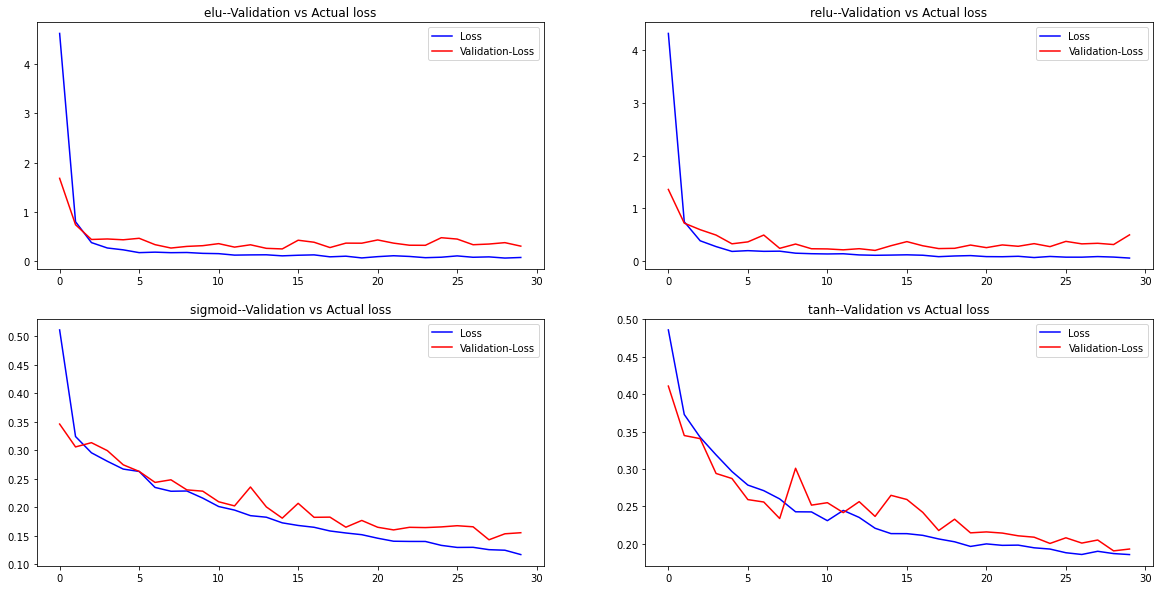

In [27]:
plt.figure(figsize= (20, 10))

for i in range(0 , len(models)):
    plt.subplot(2,2,i+1)
    plt.plot(models[i].history.history.get('loss'), color = "b"  , label = "Loss")
    plt.plot(models[i].history.history.get('val_loss') , color = "r"   , label ="Validation-Loss")
    plt.title(models[i].activation_fun +"--Validation vs Actual loss")
    plt.legend()

### Confusion matrix

In [28]:
for i in models:
    print("Confusion matrix for -", i.activation_fun,":","----------------------------")
    print(i.conf_matrix)

Confusion matrix for - elu : ----------------------------
[[868   0   1   1   0   2   6   3   2   4]
 [  0 940   2   0   0   1   0   6   6   1]
 [  2   3 832   7   0   1   0  10   7   0]
 [  2   4   6 819   0  23   0   1   5  13]
 [  3   2   0   2 784   1   2   3   6  36]
 [  0   1   0   3   0 700   6   0   5   2]
 [  5   0   4   0   5   5 794   0   8   0]
 [  0   0   2   1   0   0   0 784   0   8]
 [  5   5   7  11   4   7   2   8 793  16]
 [  0   0   1   2   4   2   0   8   3 772]]
Confusion matrix for - relu : ----------------------------
[[871   0   1   1   1   3   9   1   2   5]
 [  0 937   6   0   1   1   0   1  11   1]
 [  0   1 816   4   1   1   0   4   5   1]
 [  1   7   8 791   0   3   0   2  19   0]
 [  2   2   5   1 786   1   7   8  12  27]
 [  1   3   1  29   1 725  16   3  20  11]
 [  1   0   0   1   0   5 769   0   0   0]
 [  0   1   3   2   4   0   0 789   1   7]
 [  8   3  14  11   1   2   9   3 752   5]
 [  1   1   1   6   2   1   0  12  13 795]]
Confusion matrix for 

# Classification Reports

In [29]:
for i in models:
    print("classification report for -", i.activation_fun,":","----------------------------")
    print(i.cls_rpt)

classification report for - elu : ----------------------------
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       885
           1       0.98      0.98      0.98       955
           2       0.97      0.97      0.97       855
           3       0.94      0.97      0.95       846
           4       0.93      0.98      0.96       797
           5       0.98      0.94      0.96       742
           6       0.97      0.98      0.97       810
           7       0.99      0.95      0.97       823
           8       0.92      0.95      0.94       835
           9       0.97      0.91      0.94       852

    accuracy                           0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400

classification report for - relu : ----------------------------
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       885
     

### Accuracy values

In [34]:
for i in models:
    print("accuracy report for -", i.activation_fun,":","----------------------------")
    print(i.accuracy)

accuracy report for - elu : ----------------------------
0.9626190476190476
accuracy report for - relu : ----------------------------
0.9560714285714286
accuracy report for - sigmoid : ----------------------------
0.9507142857142857
accuracy report for - tanh : ----------------------------
0.9310714285714285


### f1- score Accuracy values

In [33]:
for i in models:
    print("f1 score report for -", i.activation_fun,":","----------------------------")
    print(i.f1_score)

f1 score report for - elu : ----------------------------
0.9626190476190476
f1 score report for - relu : ----------------------------
0.9560714285714286
f1 score report for - sigmoid : ----------------------------
0.9507142857142857
f1 score report for - tanh : ----------------------------
0.9310714285714285
